
# Задачі кластеризації та класифікації


<h2>Мета</h2>

Ознайомитись з різновидами моделей для задач кластеризації та класифікації, а також методами побудови та оцінки цих моделей. Після завершення цієї лабораторної роботи ви зможете:

* Використовувати прості моделі для задач кластеризації та класифікації
* Використовувати перехресну перевірку для оцінки якості моделі
* Обирати оптимальну складність моделі для уникнення перенавчання
* Вдосконалювати моделі за допомогою підбору параметрів


<div class="alert alert-danger alertdanger" style="margin-top: 20px">

# <h1 id="task">Завдання, що оцінюються </h1>

</div>


1. Скачайте дані із файлу <a href="https://drive.google.com/file/d/1wSj5SKRPKOjNPP2cyqaNpxRCinKEmJkO/view?usp=drive_link" target="_blank">'clean_data2.csv'</a> (Data2.csv з виправленими помилками та заповненими пропусками). Виконайте кластеризацію по ВВП на душу населення та щільності населення.
2. Використайте метод ліктя для підбору оптимальної кількості кластерів.
3. Визначіть, який регіон домінує в кожному з кластерів.
4. Побудуйте кілька (3-5) моделей класифікації, що визначають регіон, до якого належить країна, по ознаках 'GDP per capita', 'Population', 'CO2 emission', 'Area'. Оцініть точність класифікації (використайте 20% загального набору в якості тестових даних).
5. Для однієї з моделей виконайте підбір параметра. Обгрунтуйте ваш вибір.

<a name="task1"></a>
<div class="alert alert-danger alertdanger" style="margin-top: 20px">

## <h2 id="task1">Завдання  #1: </h2>

<p>Виконайте кластеризацію по ВВП на душу населення та щільності населення. </p>
</div>


Зчитую дані з файлу у датафрейм


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import linkage, dendrogram
from sklearn.metrics import mean_squared_error, r2_score, classification_report, silhouette_score, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier


In [4]:
# Напишіть ваш код нижче та натисніть Shift+Enter для виконання

df = pd.read_csv('../data/clean_data2.csv')
df.head()

,Country Name,Region,GDP per capita,Population,CO2 emission,Area,Population density
0,Afghanistan,South Asia,561.778746,34656032.0,9809.225000,652860,53.083405
1,Albania,Europe & Central Asia,4124.982390,2876101.0,5716.853000,28750,100.038296
2,Algeria,Middle East & North Africa,3916.881571,40606052.0,145400.217000,2381740,17.048902
3,American Samoa,East Asia & Pacific,11834.745230,55599.0,165114.116337,200,277.995000
4,Andorra,Europe & Central Asia,36988.622030,77281.0,462.042000,470,164.427660


Виділяю параметри для кластеризації

In [5]:
features = df[['GDP per capita', 'Population density']]
features

,GDP per capita,Population density
0,561.778746,53.083405
1,4124.982390,100.038296
2,3916.881571,17.048902
3,11834.745230,277.995000
4,36988.622030,164.427660
...,...,...
212,13445.593416,294.145714
213,2943.404534,756.074086
214,990.334774,52.245796
215,1269.573537,22.045136


Будую модель методом k середніх з кількістю кластерів 5

In [6]:
kmeans1 = KMeans(
    init='random',
    n_clusters=5,
    n_init=10,
    max_iter=300
)

kmeans1.fit(features)

KMeans(init='random', n_clusters=5, n_init=10)

<p>Отримані центри кластерів:</p>


In [7]:
kmeans1.cluster_centers_

array([[70801.76889125,  2646.54657044],
       [43104.7268005 ,   900.26897294],
       [12833.85598938,   578.38803864],
       [25288.99915571,   371.88157383],
       [ 2826.77759139,   118.94059098]])

<p>Масив із номерами кластерів для кожного рядка даних:</p>


In [8]:
kmeans1.labels_

array([4, 4, 4, 2, 1, 4, 2, 2, 4, 2, 1, 1, 4, 3, 3, 4, 2, 4, 1, 4, 4, 2,
       4, 4, 4, 4, 2, 2, 3, 4, 4, 4, 4, 4, 4, 1, 2, 4, 4, 2, 2, 2, 4, 4,
       4, 4, 2, 4, 2, 2, 2, 3, 2, 1, 2, 2, 4, 4, 4, 4, 2, 2, 2, 4, 2, 4,
       1, 1, 2, 4, 4, 4, 1, 4, 2, 2, 2, 2, 1, 4, 4, 4, 4, 4, 4, 1, 2, 0,
       4, 4, 4, 4, 0, 2, 1, 3, 4, 1, 4, 4, 4, 4, 2, 3, 4, 3, 4, 4, 2, 2,
       4, 4, 2, 2, 2, 0, 0, 4, 4, 4, 2, 2, 4, 3, 4, 4, 2, 2, 4, 4, 2, 4,
       4, 4, 4, 4, 4, 2, 4, 1, 2, 1, 4, 2, 4, 3, 0, 2, 4, 2, 2, 4, 4, 4,
       4, 2, 3, 3, 0, 2, 2, 4, 4, 1, 4, 3, 4, 4, 2, 4, 1, 2, 2, 3, 4, 4,
       4, 2, 3, 4, 2, 2, 2, 4, 4, 4, 4, 1, 0, 2, 4, 4, 4, 4, 4, 4, 2, 4,
       2, 4, 2, 4, 4, 4, 1, 1, 0, 2, 4, 4, 2, 4, 2, 4, 4, 4, 4])

<p>Візуалізую отримані кластери:</p>


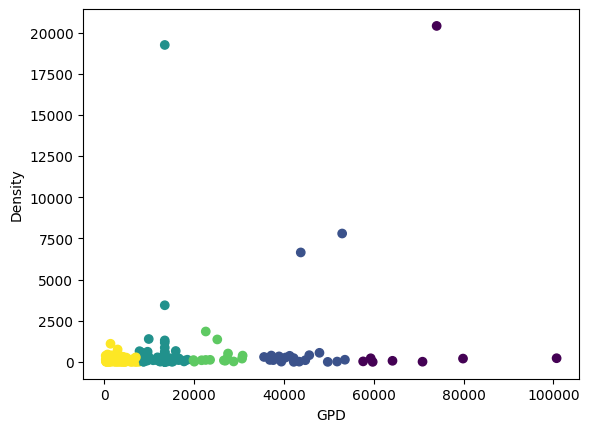

In [9]:
plt.xlabel('GPD')
plt.ylabel('Density')
plt.scatter(df[['GDP per capita']], df[['Population density']], c=kmeans1.labels_)
plt.show()

<a name="task2"></a>
<div class="alert alert-danger alertdanger" style="margin-top: 20px">

## <h2 id="task2">Завдання  #2: </h2>

<p>Використайте метод ліктя для підбору оптимальної кількості кластерів.</p>
</div>


Визначаю оптимальну кількість кластерів. Скористаюсь методом "ліктя". Для цього ініціалізую алгоритм k середніх кількістю кластерів від 1 до 10 і для кожної моделі рахую суму квадратів похибок (евклідових відстаней точок кластерів від відповідних центрів):

In [10]:
kmeans_kwargs = {
    'init': 'random',
    'n_init': 10,
    'max_iter': 300,
    'random_state': 42,
}

sse = []
max_kernels = 10
for k in range(1, max_kernels + 1):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(features)
    sse.append(kmeans.inertia_)

<p>Візуалізую отримані результати:</p>


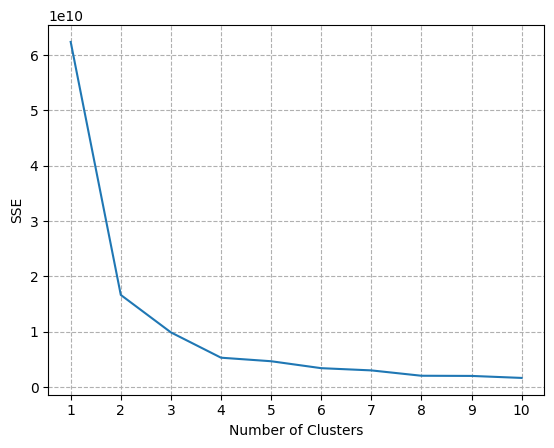

In [11]:
plt.plot(range(1, max_kernels + 1), sse)
plt.xticks(range(1, max_kernels + 1))
plt.xlabel('Number of Clusters')
plt.ylabel('SSE')
plt.grid(linestyle='--')
plt.show()

<p>Оптимальна кількість кластерів дорівнює 4</p>
<p>Візуалізую для оптимальної кількості кластерів:</p>

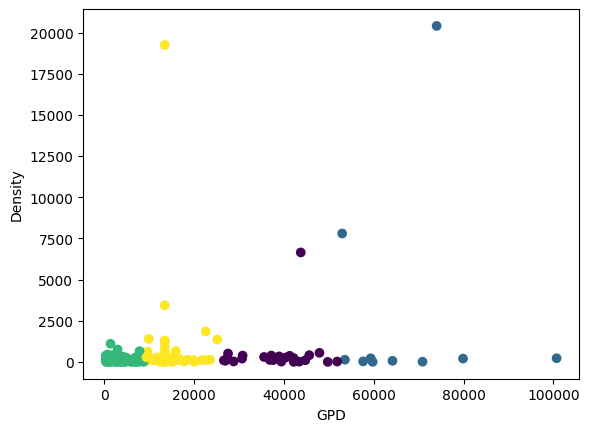

In [12]:
kmeans1 = KMeans(
    init='random',
    n_clusters=4,
    n_init=10,
    max_iter=300
)

kmeans1.fit(features)

plt.xlabel('GPD')
plt.ylabel('Density')
plt.scatter(df[['GDP per capita']], df[['Population density']], c=kmeans1.labels_)
plt.show()

<a name="task3"></a>
<div class="alert alert-danger alertdanger" style="margin-top: 20px">

## <h2 id="task3">Завдання  #3: </h2>

<p>Визначіть, який регіон домінує в кожному з кластерів.</p>
</div>


Додаю мітки кластерів в датафрейм

In [13]:
df['Cluster'] = kmeans1.labels_

Визначаю домінуючий регіон для кожного кластера

In [14]:
dominant_regions = df.groupby('Cluster')['Region'].value_counts()
dominant_regions

Cluster  Region                    
0        Europe & Central Asia         12
         East Asia & Pacific            7
         Middle East & North Africa     3
         Latin America & Caribbean      2
         North America                  1
1        Europe & Central Asia          6
         East Asia & Pacific            2
         Middle East & North Africa     1
         North America                  1
2        Sub-Saharan Africa            43
         East Asia & Pacific           21
         Europe & Central Asia         19
         Latin America & Caribbean     19
         Middle East & North Africa    10
         South Asia                     7
3        Europe & Central Asia         21
         Latin America & Caribbean     21
         East Asia & Pacific            7
         Middle East & North Africa     7
         Sub-Saharan Africa             5
         North America                  1
         South Asia                     1
Name: count, dtype: int64

<a name="task4"></a>
<div class="alert alert-danger alertdanger" style="margin-top: 20px">

## <h2 id="task4">Завдання  #4: </h2>

<p>Побудуйте кілька (3-5) моделей класифікації, що визначають регіон, до якого належить країна, по ознаках 'GDP per capita', 'Population', 'CO2 emission', 'Area'. Оцініть точність класифікації (використайте 20% загального набору в якості тестових даних).</p>
</div>


 Обираю потрібні ознаки:


In [15]:
all_features=pd.get_dummies(df[['GDP per capita', 'Population', 'CO2 emission', 'Area']])


all_features[['Region']] = df[['Region']]

 Розділяю датасет на навчальну і тестову вибірки за допомогою функції <code>train_test_split()</code>:


In [38]:
df_train, df_test = train_test_split(
    all_features,
    test_size=0.2,
    random_state=0
)
df_train.head()


,GDP per capita,Population,CO2 emission,Area,Region
189,13445.593416,18430453.0,30703.791000,185180,Middle East & North Africa
146,70868.122500,5232929.0,47626.996000,385178,Europe & Central Asia
130,13445.593416,38499.0,165114.116337,2,Europe & Central Asia
22,2773.547135,797765.0,1001.091000,38394,South Asia
181,9364.821525,178015.0,407.037000,620,Latin America & Caribbean


In [39]:
df_train.shape, df_test.shape

((173, 5), (44, 5))

<p>Розміщую цільові дані - Region -  в окремому датафреймі:</p>

In [40]:
x_train = df_train[['GDP per capita', 'Population', 'CO2 emission', 'Area']]
y_train = df_train[['Region']]

x_test = df_test[['GDP per capita', 'Population', 'CO2 emission', 'Area']]
y_test = df_test[['Region']]

<h3>Навчання та тестування моделей:</h3>

Для навчання були обрані наступні методи:

- k-nearest neighbors;
- Support vector machines;
- Decision Tree;
- Random Forest;
- Extra Trees;

In [41]:
from sklearn.metrics import mean_squared_error, r2_score, classification_report, confusion_matrix
from sklearn.model_selection import cross_val_score, KFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [50]:
def show_confusion_matrix(matrix, title):
    ax = sns.heatmap(matrix, annot=True, cmap='Greens')
    ax.set_title(title)
    ax.set_xlabel('\nPredicted Values')
    ax.set_ylabel('Actual Values ')
    #ax.xaxis.set_ticklabels(['Negative', 'Positive'])  # тільки для 2 класів
    #ax.yaxis.set_ticklabels(['False', 'True'])         # тільки для 2 класів

    plt.show()

 <h3>Метод 1 k-nearest neighbors</h3>


Будую модель


In [94]:
KNN_model = KNeighborsClassifier(n_neighbors=5)
KNN_model.fit(x_train, y_train)

c:\Users\slden\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier()

Оцінюю точність

In [96]:
print('mean accuracy = ', KNN_model.score(x_test, y_test))
print(classification_report(y_test, KNN_model.predict(x_test)))

print(confusion_matrix(y_test, KNN_model.predict(x_test)))

mean accuracy =  0.3181818181818182
                            precision    recall  f1-score   support

       East Asia & Pacific       0.38      0.27      0.32        11
     Europe & Central Asia       0.38      0.42      0.40        12
 Latin America & Caribbean       0.11      0.14      0.12         7
Middle East & North Africa       0.00      0.00      0.00         2
                South Asia       0.00      0.00      0.00         2
        Sub-Saharan Africa       0.45      0.50      0.48        10

                  accuracy                           0.32        44
                 macro avg       0.22      0.22      0.22        44
              weighted avg       0.32      0.32      0.32        44

[[3 3 4 0 0 1]
 [0 5 2 1 0 4]
 [2 4 1 0 0 0]
 [2 0 0 0 0 0]
 [0 0 1 0 0 1]
 [1 1 1 2 0 5]]


c:\Users\slden\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\slden\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\slden\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

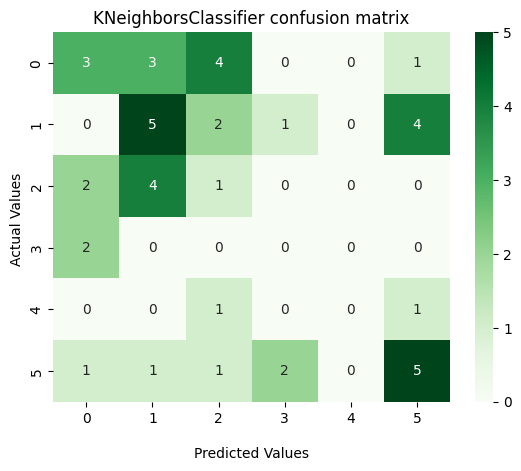

In [51]:
show_confusion_matrix(confusion_matrix(y_test, KNN_model.predict(x_test)), 'KNeighborsClassifier confusion matrix')

 <h3>Метод 2 Support vector machines;</h3>


Будую модель


In [91]:
SVC_model = SVC()
SVC_model.fit(x_train, y_train)

c:\Users\slden\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC()

Оцінюю точність

In [92]:
print('mean accuracy = ', SVC_model.score(x_test, y_test))

mean accuracy =  0.2727272727272727


 <h3>Метод 3 Decision Tree Classifier</h3>


Будую модель


In [89]:
decision_tree = DecisionTreeClassifier(max_depth=3, random_state=1)
decision_tree.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=1)

Оцінюю точність

In [90]:
decision_tree.score(x_test, y_test)

0.4090909090909091

 <h3>Метод  Random Forest;</h3>


Будую модель


In [87]:
randomforest = RandomForestClassifier(max_depth=5)
random_scores = cross_val_score(randomforest, x_train, y_train, cv=5)
randomforest.fit(x_train, y_train)


c:\Users\slden\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_split.py:737: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(
c:\Users\slden\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
c:\Users\slden\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
c:\Users\slden\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Ple

RandomForestClassifier(max_depth=5)

Оцінюю точність

In [88]:
randomforest.score(x_test, y_test)

0.5681818181818182

 <h3>Метод Extra Trees</h3>


Будую модель


In [85]:
extratrees = ExtraTreesClassifier(max_depth=5)
extra_scores = cross_val_score(extratrees, x_train, y_train, cv=5)
extratrees.fit(x_train, y_train)

c:\Users\slden\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_split.py:737: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(
c:\Users\slden\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
c:\Users\slden\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
c:\Users\slden\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Ple

c:\Users\slden\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
c:\Users\slden\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
c:\Users\slden\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


ExtraTreesClassifier(max_depth=5)

Оцінюю точність

In [86]:
extratrees.score(x_test, y_test)

0.4772727272727273

<a name="task5"></a>
<div class="alert alert-danger alertdanger" style="margin-top: 20px">

## <h2 id="task5">Завдання  #5: </h2>

<p>Для однієї з моделей виконайте підбір параметра. Обгрунтуйте ваш вибір.</p>
</div>


<p>Скористаюсь методом "ліктя" для визначення параметра висоти дерева методу Decision Tree Classifier </p>
<p>Для цього ініціалізую алгоритм з параметром max_depth від 1 до 30 і для кожної моделі порахую meam accuracy:</p>

In [102]:
accur = []
max_kernels = 30
for k in range(1, max_kernels + 1):
    decision_tree = DecisionTreeClassifier(max_depth=k, random_state=1)
    decision_tree.fit(x_train, y_train)
    accur.append(decision_tree.score(x_test, y_test))

 Отримані показники якості візуалізую на графіку:


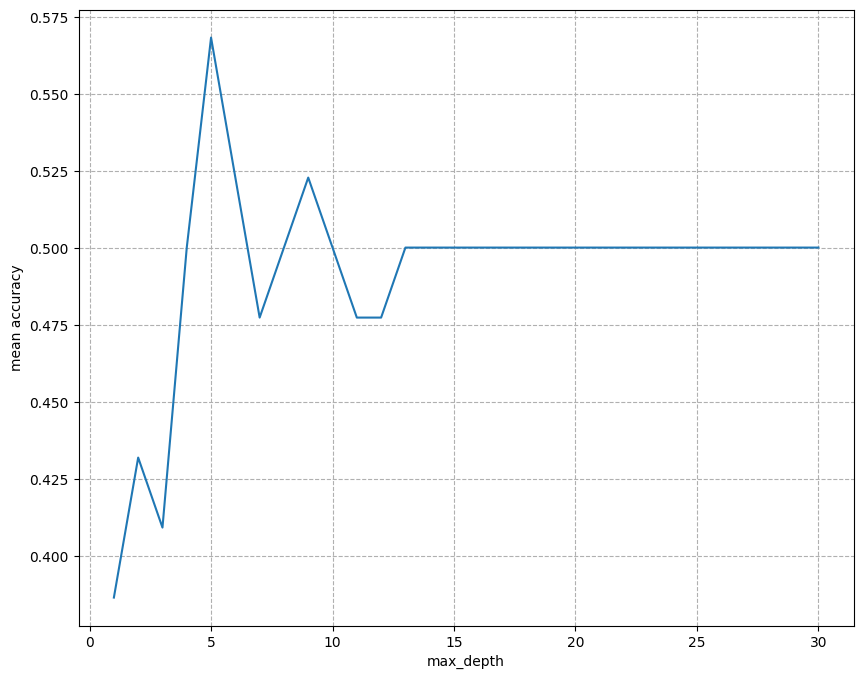

In [103]:
plt.figure(figsize=(10, 8))
plt.plot(range(1, max_kernels + 1), accur)
plt.xticks(range(0, max_kernels + 1,5))
plt.xlabel('max_depth')
plt.ylabel('mean accuracy')
plt.grid(linestyle='--')
plt.show()

З графіку бачу, що зі збільшенням висоти дерева точність спочатку різко зростає, а потім трохи падає і стабілізуєьбся. 1-6 для одиночного дерева брати не варто. Стабілізація точності близько 0.515 спостерігається з max_depth = 17, для значень від 14 точність класифікації однакома 0.5, візьмемо саме це значення, бо більша висота вже не покращить результат.

<a name="task6"></a>
<div class="alert alert-danger alertdanger" style="margin-top: 20px">

## <h2 id="task6"> Додаткове завдання: </h2>

<p>Використовуючи файл <a href="https://drive.google.com/file/d/1gxqzPQNlqrwrJI3zstMsvHQAbsdMPe-2/view?usp=drive_link" target="_blank">Data5.csv</a>:

1. Визначити кластер країн з найкращим розвитком (кластеризувати по Ie, Iec, Is; для k-середніх використати 4 кластера). Побудувати центри кластерів.
2. Провести кластеризацію по Сql, порахувати скільки країн потрапило в різні кластери, якщо порівнювати з п1.</p>
</div>


Згідно з методологією вимірювання сталого розвитку країн, сталий розвиток оцінюється за допомогою відповідного індексу у просторі трьох вимірів: економічного (Іес), екологічного (Іе) і соціально-інституціонального (Is). Цей індекс є вектором, норма якого визначає рівень сталого розвитку, а його просторове положення в системі координат (Iec,Ie,Is) характеризує міру «гармонійності» цього розвитку.

<details><summary>Натисніть тут, щоб побачити підказку</summary>

```python
# Зчитуємо заданий набір даних, зразу коригуючи
df = pd.read_csv(
    'Data5.csv', encoding='windows-1251', sep=';', decimal=','
).rename(columns={'Unnamed: 0': 'Country'})

df

```

</details>



In [109]:

df = pd.read_csv(
    '../data/Data5.csv', encoding='windows-1251', sep=';', decimal=','
).rename(columns={'Unnamed: 0': 'Country'})

df.head()

,Country,ISO,UA,Cql,Ie,Iec,Is
0,Albania,ALB,Албанія,0.973924,0.605348,0.538673,0.510113
1,Algeria,DZA,Алжир,0.782134,0.587219,0.348159,0.497986
2,Angola,AGO,Ангола,0.372344,0.274394,0.332117,0.346907
3,Argentina,ARG,Аргентина,0.883830,0.699685,0.281995,0.518820
4,Armenia,ARM,Вірменія,1.016499,0.718327,0.535648,0.486498


In [112]:
features = df[['Ie', 'Iec', 'Is']]
features.head()



,Ie,Iec,Is
0,0.605348,0.538673,0.510113
1,0.587219,0.348159,0.497986
2,0.274394,0.332117,0.346907
3,0.699685,0.281995,0.518820
4,0.718327,0.535648,0.486498


In [114]:
kmeans1 = KMeans(
    init='random',
    n_clusters=4,
    n_init=10,
    max_iter=300
)

kmeans1.fit(features)

KMeans(init='random', n_clusters=4, n_init=10)

In [115]:
# отримую центри кластерів
kmeans1.cluster_centers_

array([[0.76853461, 0.66849294, 0.63963314],
       [0.50062486, 0.43545445, 0.47490056],
       [0.67025222, 0.51146735, 0.52570366],
       [0.26373834, 0.39763907, 0.40589422]])

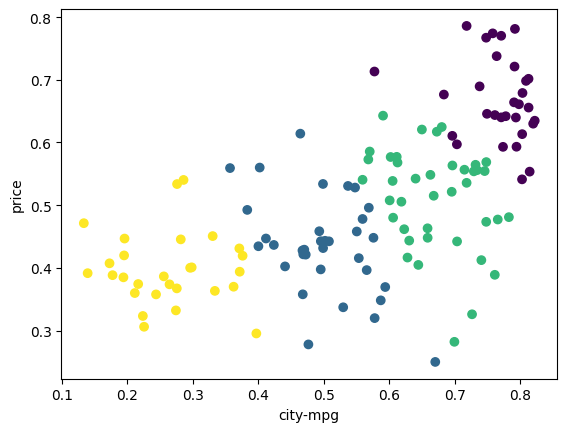

In [117]:
plt.xlabel('city-mpg')
plt.ylabel('price')
plt.scatter(df[['Ie']], df[['Iec']], c=kmeans1.labels_)
plt.show()

<h2>Виконав студент групи ІП-24 <br> Денисенко В'ячеслав</h2>
